<a href="https://colab.research.google.com/github/manasamadgul/ML_Project/blob/main/Classify_15categories_Dinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.getcwd()


'/content'

In [ ]:
import kagglehub

path = kagglehub.dataset_download("larserikrisholm/dinosaur-image-dataset-15-species")

# Download latest version
#path = kagglehub.dataset_download("cmglonly/simple-dinosurus-dataset")

print("Path to dataset files:", path)


100%|██████████| 462M/462M [00:05<00:00, 93.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/larserikrisholm/dinosaur-image-dataset-15-species/versions/2


In [ ]:
import os
os.path.abspath(path)

'/root/.cache/kagglehub/datasets/larserikrisholm/dinosaur-image-dataset-15-species/versions/2'

['/root/.cache/kagglehub/datasets/larserikrisholm/dinosaur-image-dataset-15-species/versions/2', '/root/.cache/kagglehub/datasets/larserikrisholm/dinosaur-image-dataset-15-species/versions/2/dinosaur_dataset', '/root/.cache/kagglehub/datasets/larserikrisholm/dinosaur-image-dataset-15-species/versions/2/dinosaur_dataset/Corythosaurus', '/root/.cache/kagglehub/datasets/larserikrisholm/dinosaur-image-dataset-15-species/versions/2/dinosaur_dataset/Dimorphodon', '/root/.cache/kagglehub/datasets/larserikrisholm/dinosaur-image-dataset-15-species/versions/2/dinosaur_dataset/Stegosaurus', '/root/.cache/kagglehub/datasets/larserikrisholm/dinosaur-image-dataset-15-species/versions/2/dinosaur_dataset/Gallimimus', '/root/.cache/kagglehub/datasets/larserikrisholm/dinosaur-image-dataset-15-species/versions/2/dinosaur_dataset/Spinosaurus', '/root/.cache/kagglehub/datasets/larserikrisholm/dinosaur-image-dataset-15-species/versions/2/dinosaur_dataset/Velociraptor', '/root/.cache/kagglehub/datasets/larse

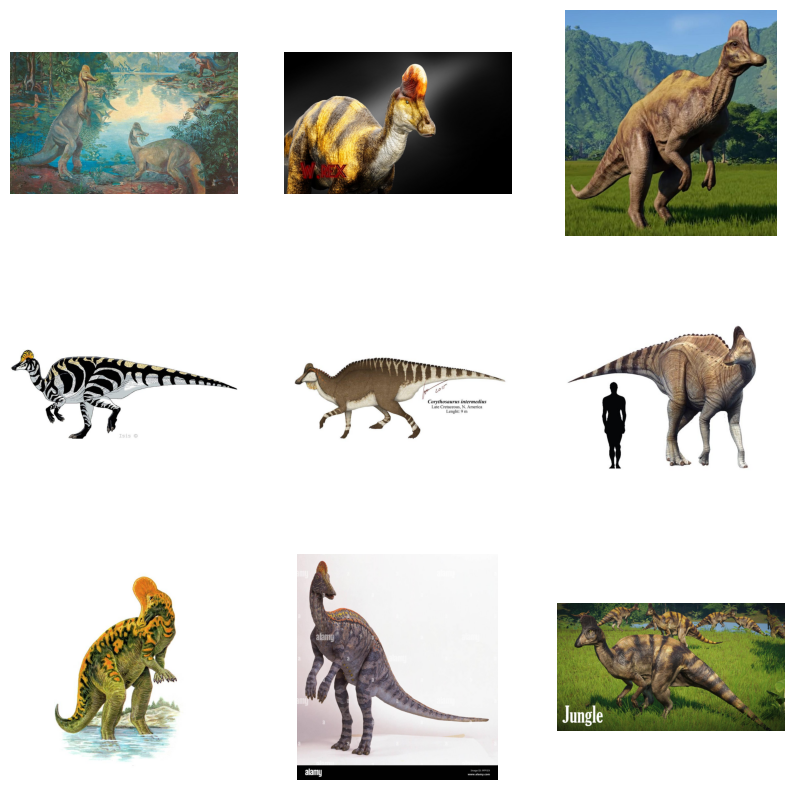

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt


# Set the path to your dataset folder
os.chdir(path)
print([x[0] for x in os.walk(path)])
image_files = [os.path.join(dirpath, file)
               for dirpath, dirnames, filenames in os.walk(path)
               for file in filenames
               if file.endswith(('.jpg', '.png', '.jpeg'))]
print(len(image_files)) # Using len to get count

plt.figure(figsize=(10, 10))
for i, file in enumerate(image_files[:9]):  # Display the first 9 images
    img_path = os.path.join(path, file)
    img = Image.open(img_path)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()


In [ ]:
from fastai.vision.all import *

# Define the path to the dataset
#path = Path('/root/.cache/kagglehub/datasets/cmglonly/simple-dinosurus-dataset/versions/1')

# Create a DataBlock
dino_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)  # Resizing images for uniformity
)

# Create a DataLoaders object
dls = dino_block.dataloaders(path, bs=32)  # bs is the batch size



In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 161MB/s]


In [ ]:
learn.fine_tune(8)  # Fine-tune for 5 epochs; adjust as needed

epoch,train_loss,valid_loss,error_rate,time
0,2.792572,1.434614,0.425358,06:48


epoch,train_loss,valid_loss,error_rate,time
0,1.364155,1.127620,0.349693,09:39
1,0.953453,0.957005,0.288344,09:35
2,0.632225,0.931039,0.241309,09:31
3,0.406393,0.870246,0.235174,09:33
4,0.260789,0.812252,0.226994,09:35
5,0.165083,0.786505,0.212679,09:32
6,0.120262,0.796534,0.218814,09:36
7,0.096004,0.792037,0.208589,09:38


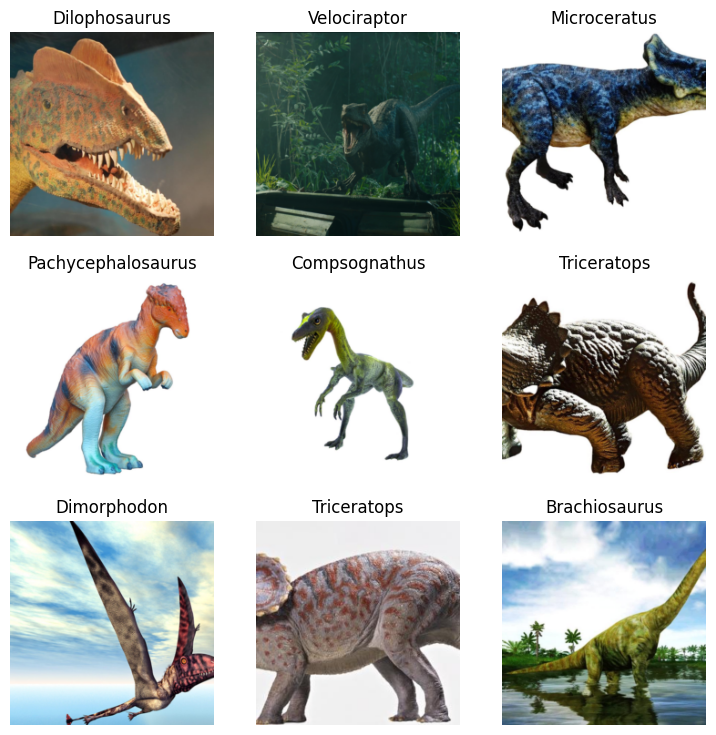

In [ ]:
dls.show_batch(max_n=9)

In [ ]:
!pip install ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.5 MB/s eta 0:00:00


Upload your own image to check if model actually works

In [ ]:
from pathlib import Path # Import the Path class from the pathlib module

learn.path = Path()

learn.export()

path = Path()
path.absolute()
path.ls(file_exts='.pkl')

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
import os
os.getcwd()

'/root/.cache/kagglehub/datasets/larserikrisholm/dinosaur-image-dataset-15-species/versions/2'

In [ ]:
import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader


FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(uploader.data[0])
pred_class, pred_idx, probs = learn.predict(img)

print(f"Predicted class: {pred_class}")
print(f"Class index: {pred_idx}")
print(f"Class probabilities: {probs}")


Predicted class: Gallimimus
Class index: 6
Class probabilities: tensor([2.8804e-03, 8.2180e-02, 2.9585e-01, 1.0769e-04, 6.9364e-04, 9.5923e-03,
        5.5223e-01, 8.2545e-04, 1.0322e-02, 4.5669e-03, 2.0994e-03, 1.4494e-03,
        7.8139e-03, 9.9622e-04, 2.8393e-02])


In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.dls.vocab

['Ankylosaurus', 'Brachiosaurus', 'Compsognathus', 'Corythosaurus', 'Dilophosaurus', 'Dimorphodon', 'Gallimimus', 'Microceratus', 'Pachycephalosaurus', 'Parasaurolophus', 'Spinosaurus', 'Stegosaurus', 'Triceratops', 'Tyrannosaurus_Rex', 'Velociraptor']

In [ ]:
labels = learn_inf.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}
